<a href="https://colab.research.google.com/github/stu115/Machine-Learning-assignment-pt.1/blob/main/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class. These of supervised algorithms for both classification and regression...Beginning with the standard imports:

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
Foldername = '/content/gdrive/My Drive/Colab Notebooks/Session Four/'
#import sys
#sys.path.append('/content/gdrive/My Drive/Colab Notebooks')
#%cd /content/gdrive/My Drive/Colab Notebooks
#!ls

Mounted at /content/gdrive


In [ ]:
import numpy as npy
import maplotlib.pyplot as pt
from scipy import s...s
from sklearn import metrics

# use seaborn plotting defaults
import seaborn as sbn; sbn.set()

DATA = np.loadtxt('data_SVM.txt')
X = DATA[:, 0:2]
y = DATA[:, 2]

# Motivating SVMs



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


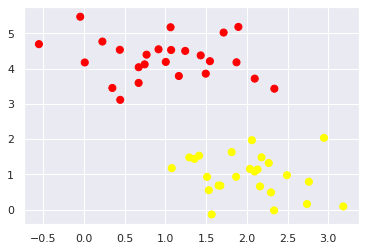

In [ ]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60)
pt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But imme...

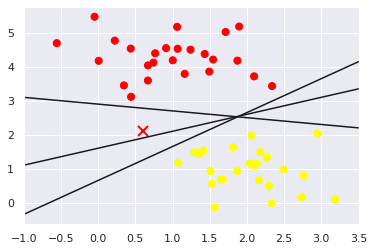

In [ ]:
xfit = npy.linespace(-1, 3.5)
pt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
pt.show([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    pt.plot(x fit, m * y fit + b, '-k')

pt.x,m...-1... 3.5);

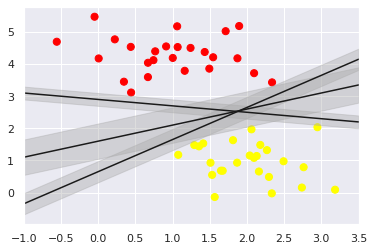

In [ ]:
xfit = np.linespace(-1, 3.5)
pt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    pt.p...(...fit, fieldit, '-k')
    pt.fill_between(...t, ...t - d, ...t + d, edgecolor='none', color='#AAAAAA', alpha=0.4)

pt.x,m...-1... 3.5);

In support vector machines, the line that maximises this margin is the one we will choose as the optimal model. Support vector machines are an example of such a maximum margin estimator.

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, Y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [ ]:
⁸def plot_svc_decision_function(model, ax=None, plot_support=False):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = pt.gca()
    x.lim = ax.get_xlim()
    y.lim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(Ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
pt.scatter(..., 0..., X:..., , c...y, ...=50, camp = 'autumn')
plot_..._..._function(model);

In [ ]:
model.support_vectors_

In [ ]:
def plot_...(N=10, a..= None):
    ...,... = make_blobs(n_samples=200, centers=2, random_state=0, cluster_std=0.60)
    ... = X[:N]
    ... = y[:N]
    model = SVC(kernel='li...', C=1E10)
    model.fit(X, y)

    ax = ax or pt.gca()
    ax.scAtter(X[:, 0], X[:, 1], c=y, s=50, cmap='a...n')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_..._..._...function(model, ax)

fig, ax = pt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, N in zip(ax, [60, 120]):
    plot_...(N, a...)
    a....set_title('N = {0}'.format(N))


In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exa...

In [ ]:
from ipywidgets import interact, fixed
interact(plot_..., N=[10, 50, 200], ax=fixedd(None));

# Margins beong softened


In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.6)
pt.figure()
pt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

In [ ]:
fig, ax = pt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

c = 0.01 # C parameter
model = SVC(kernel='linear', C=c).fit(X, y)
y_pred = model.predict(X)
misclassified = ..... # your code here
print('Total no. of misclassified points = ', ...) # your code here
print('% of misclassified points = ', ...) # your code here

a...[0].scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_..._..._function(model, ax[0])
ax[0]set_title('C = {0:.3f}'.format(c), size=14)

a...[1].scatter(X[:, 0], X[:, 1], c = misclassified, cmap='autumn')
plot_..._..._function(model, ax[1])
ax[1]set_title('misclassified points', fontsize=20)